In [48]:
import pandas as pd
import biblib.bib
import re
import graphviz
import os
import sys
import math
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz
import matplotlib.pyplot as plt
from semanticscholar import SemanticScholar
from unidecode import unidecode
from alphabet_detector import AlphabetDetector
import seaborn as sns
from netgraph import Graph
import nltk
from nltk.stem import WordNetLemmatizer
import collections
import re
import json

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samueleceol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samueleceol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samueleceol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Glossary file contains:
    # All paper from initial selection (65)
    # All the FS and BS papers obtained from the query with proximity constraint
def get_glossary():
    with open('Glossary.bib', 'r') as glossary:
        db = biblib.bib.Parser().parse(glossary, log_fp=sys.stderr).get_entries()
        return db
glossary = get_glossary()

In [4]:
components = list(nx.connected_components(nx.Graph(nx.nx_pydot.read_dot('ALL_selection_only.dot'))))
components_info = []

for component in components:
    cur_component = {}

    for paper in component:
        cur_component[paper] = {}

        if paper.replace('\\n','') in glossary:
            cur_paper = glossary[paper.replace('\\n','')]
        else:
            print(f"Paper not in Glossary: {paper}")
        cur_component[paper]['title'] = cur_paper['title']
        cur_component[paper]['author'] = cur_paper['author']
        if('journal' in cur_paper):
            cur_component[paper]['journal'] = cur_paper['journal']
        else:
            print(f"missing journal: {paper}")
        if('abstract' in cur_paper):
            cur_component[paper]['abstract'] = cur_paper['abstract']
        else:
            print(f"missing abstract: {paper}")

    components_info.append(cur_component)

Paper not in Glossary: \n


In [161]:
def remove_punctuation(input_string):
    return re.sub(r'[^\w\s]', '', input_string)

def remove_stopwords(input_string):
    remove_tokens = ['topic', 'model', 'topic_model']
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(input_string.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    bigrams_trigrams = list(nltk.everygrams(tokens, 2, 3))
    bigrams_trigrams = ['_'.join(list(gram)).replace("'", '') for gram in bigrams_trigrams]
    tokens += bigrams_trigrams
    tokens = [token for token in tokens if token not in remove_tokens]
    return tokens

def count_tokens(input_string):
    tokens = remove_stopwords(remove_punctuation(input_string))
    return collections.Counter(tokens)

def compute_common_words(component_nr):
    title_abstr_str = ''

    # 0, 2, 8
    cur_comp_info = components_info[component_nr]
    for paper in cur_comp_info:
        cur_paper = cur_comp_info[paper]
        title_abstr_str += f" {cur_paper['title']}"
        title_abstr_str += f" {cur_paper['abstract']}"

    token_count = count_tokens(title_abstr_str)
    return dict(sorted(token_count.items(), key=lambda item: item[1], reverse=True))

print(compute_common_words(8))

{'research': 29, 'science': 14, 'scientific': 14, 'method': 14, 'study': 13, 'evolutionary': 13, 'trust': 13, 'community': 12, 'technological': 12, 'analysis': 11, 'paper': 10, 'pathway': 10, 'relationship': 10, 'technology': 10, 'bibliometric': 9, 'knosys': 9, 'time': 9, 'evolutionary_pathway': 9, 'used': 8, 'data': 8, 'manufacturing': 8, 'knowledge': 7, 'evolution': 7, 'covid19': 7, 'approach': 7, 'context': 7, 'evaluation': 7, 'innovation': 7, 'science_technology': 7, 'technological_topic': 7, 'change': 6, 'empirical': 6, 'path': 6, 'identify': 6, 'smart': 6, 'trust_evaluation': 6, 'system': 5, 'journal': 5, 'important': 5, 'process': 5, 'result': 5, 'pandemic': 5, 'across': 5, 'based': 5, 'identification': 5, 'patent': 5, 'help': 5, 'analytics': 5, 'firm': 5, 'network': 5, 'smart_manufacturing': 5, 'topicbased': 4, 'published': 4, 'focus': 4, 'latent': 4, 'trend': 4, 'identified': 4, 'learning': 4, 'decision': 4, 'practical': 4, 'insight': 4, 'early': 4, 'among': 4, 'topicsensitive

In [135]:
top_words_1 = list(compute_common_words(0))[:15]
top_words_2 = list(compute_common_words(2))[:15]
top_words_3 = list(compute_common_words(8))[:15]

[word for word in top_words_1 if word not in top_words_2]

['label',
 'using',
 'labeling',
 'term',
 'method',
 'document',
 'automatic',
 'measure',
 'medium',
 'coherence',
 'topic_labeling',
 'topic_label',
 'list']

In [136]:
[word for word in top_words_2 if word not in top_words_1]

['review',
 'study',
 'analysis',
 'online',
 'service',
 'sentiment',
 'consumer',
 'data',
 'customer',
 'quality',
 'online_review',
 'result',
 'text']

In [132]:
[word for word in top_words_3 if word not in top_words_2 and word not in top_words_1]

['science',
 'scientific',
 'evolutionary',
 'trust',
 'community',
 'technological',
 'paper',
 'pathway',
 'relationship',
 'technology',
 'bibliometric']

In [111]:
count = 0

cur_comp_info = components_info[0]
for paper in cur_comp_info:
    cur_paper = cur_comp_info[paper]
    print(f"[{paper}]: {cur_paper['abstract']}")

[li_2020_global_surveillance_of_covid_19_by_mining_news_media_using_a_multi_source_dynamic_embedded_topic_model]: As the COVID-19 pandemic continues to unfold, understanding the global impact of non-pharmacological interventions (NPI) is important for formulating effective intervention strategies, particularly as many countries prepare for future waves. We used a machine learning approach to distill latent topics related to NPI from large-scale international news media. We hypothesize that these topics are informative about the timing and nature of implemented NPI, dependent on the source of the information (e.g., local news versus official government announcements) and the target countries. Given a set of latent topics associated with NPI (e.g., self-quarantine, social distancing, online education, etc), we assume that countries and media sources have different prior distributions over these topics, which are sampled to generate the news articles. To model the source-specific topic pr

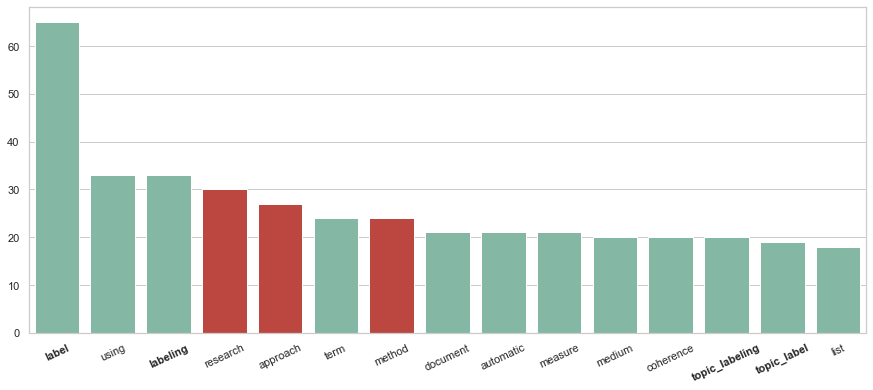

In [159]:
import seaborn as sns 
import matplotlib.pyplot as plt

top_words_1 = list(compute_common_words(0))[:15]
top_words_2 = list(compute_common_words(2))[:15]
top_words_3 = list(compute_common_words(8))[:15]

accepted_terms = [word for word in top_words_1 if word not in top_words_2 and word not in top_words_3]

# Data 
term_counts = {'label': 65, 
               'using': 33, 
               'labeling': 33, 
               'research': 30, 
               'approach': 27, 
               'term': 24, 
               'method': 24, 
               'document': 21, 
               'automatic': 21, 
               'measure': 21, 
               'medium': 20, 
               'coherence': 20, 
               'topic_labeling': 20, 
               'topic_label': 19, 
               'list': 18}
               

# Convert data to lists 
labels = list(term_counts.keys()) 
values = list(term_counts.values()) 

# Create barplot using Seaborn 
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style='whitegrid')
color = (0.3, 0.7, 0.5, 0.7) # tuple with RGB values and alpha value
cols = ['#D1342B' if term not in accepted_terms else '#7CBFA6' for term in term_counts]
ax = sns.barplot(x=labels, y=values, color=color, palette=cols)

# Bold x axis ticks that contain the root term "label*"
for tick in ax.get_xticklabels():
    if 'label' in tick.get_text():
        tick.set_weight('bold')

plt.xticks(rotation=25)
plt.show()

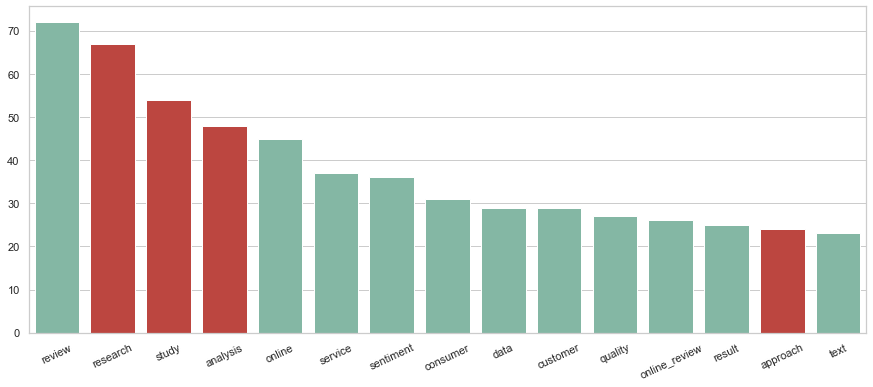

In [160]:
import seaborn as sns 
import matplotlib.pyplot as plt

top_words_1 = list(compute_common_words(0))[:15]
top_words_2 = list(compute_common_words(2))[:15]
top_words_3 = list(compute_common_words(8))[:15]

accepted_terms = [word for word in top_words_2 if word not in top_words_1 and word not in top_words_3]

# Data 
term_counts = { 'review': 72, 
                'research': 67, 
                'study': 54,
                'analysis': 48,
                'online': 45,
                'service': 37,
                'sentiment': 36,
                'consumer': 31,
                'data': 29,
                'customer': 29,
                'quality': 27,
                'online_review': 26,
                'result': 25,
                'approach': 24,
                'text': 23}
               

# Convert data to lists 
labels = list(term_counts.keys()) 
values = list(term_counts.values()) 

# Create barplot using Seaborn 
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style='whitegrid')
color = (0.3, 0.7, 0.5, 0.7) # tuple with RGB values and alpha value
cols = ['#D1342B' if term not in accepted_terms else '#7CBFA6' for term in term_counts]
ax = sns.barplot(x=labels, y=values, color=color, palette=cols)

# Bold x axis ticks that contain the root term "label*"
for tick in ax.get_xticklabels():
    if 'label' in tick.get_text():
        tick.set_weight('bold')

plt.xticks(rotation=25)
plt.show()

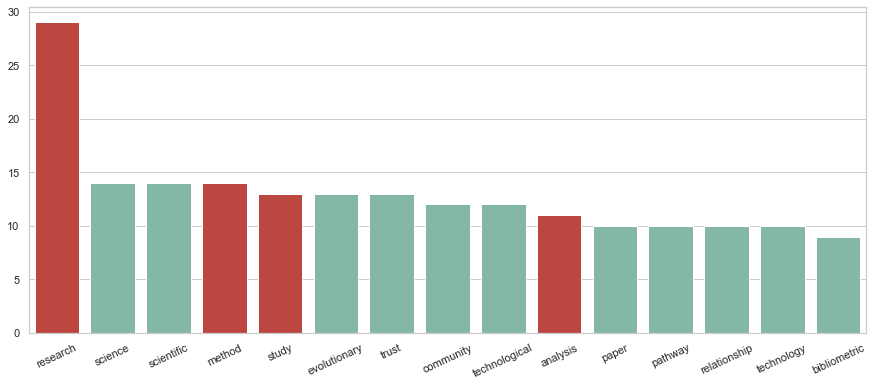

In [163]:
import seaborn as sns 
import matplotlib.pyplot as plt

top_words_1 = list(compute_common_words(0))[:15]
top_words_2 = list(compute_common_words(2))[:15]
top_words_3 = list(compute_common_words(8))[:15]

accepted_terms = [word for word in top_words_3 if word not in top_words_1 and word not in top_words_2]

# Data 
term_counts = { 'research': 29,
                'science': 14,
                'scientific': 14,
                'method': 14,
                'study': 13,
                'evolutionary': 13,
                'trust': 13,
                'community': 12,
                'technological': 12,
                'analysis': 11,
                'paper': 10,
                'pathway': 10,
                'relationship': 10,
                'technology': 10,
                'bibliometric': 9}
               

# Convert data to lists 
labels = list(term_counts.keys()) 
values = list(term_counts.values()) 

# Create barplot using Seaborn 
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style='whitegrid')
color = (0.3, 0.7, 0.5, 0.7) # tuple with RGB values and alpha value
cols = ['#D1342B' if term not in accepted_terms else '#7CBFA6' for term in term_counts]
ax = sns.barplot(x=labels, y=values, color=color, palette=cols)

# Bold x axis ticks that contain the root term "label*"
for tick in ax.get_xticklabels():
    if 'label' in tick.get_text():
        tick.set_weight('bold')

plt.xticks(rotation=25)
plt.show()

In [112]:
init_selection = [
    'card_2018_neural_models_for_documents_with_metadata',
    'lau_2017_topically_driven_neural_language_model',
    'wu_2020_neural_mixed_counting_models_for_dispersed_topic_discovery',
    'maiti_2019_spatial_aggregation_facilitates_discovery_of_spatial_topics',
    'huang_2018_phrasectm_correlated_topic_modeling_on_phrases_within_markov_random_fields',
    'ahmadvand_2019_concet_entity_aware_topic_classification_for_open_domain_conversational_agents',
    'hosseiny_marani_2022_one_rating_to_rule_them_all_evidence_of_multidimensionality_in_human_assessment_of_topic_labeling_quality',
    'nouri_2020_mining_crowdsourcing_problems_from_discussion_forums_of_workers',
    'yin_2022_improving_deep_embedded_clustering_via_learning_cluster_level_representations',
    'an_2018_model_free_context_aware_word_composition',
    'austin_2022_community_topic_topic_model_inference_by_consecutive_word_community_discovery',
    'sorodoc_2017_multimodal_topic_labelling',
    'zhao_2021_adversarial_learning_of_poisson_factorisation_model_for_gauging_brand_sentiment_in_user_reviews',
    'popa_2021_bart_tl_weakly_supervised_topic_label_generation',
    'aletras_2017_labeling_topics_with_images_using_a_neural_network',
    'zosa_2022_multilingual_topic_labelling_of_news_topics_using_ontological_mapping',
    'ferner_2020_a_semi_discriminative_approach_for_sub_sentence_level_topic_classification_on_a_small_dataset',
    'hu_2020_neural_topic_modeling_with_cycle_consistent_adversarial_training',
    'yang_2017_adapting_topic_models_using_lexical_associations_with_tree_priors',
    'wang_2021_phrase_bert_improved_phrase_embeddings_from_bert_with_an_application_to_corpus_exploration',
    'zhou_2020_condolence_and_empathy_in_online_communities',
    'zhang_2018_taxogen_unsupervised_topic_taxonomy_construction_by_adaptive_term_embedding_and_clustering',
    'huang_2020_corel_seed_guided_topical_taxonomy_construction_by_concept_learning_and_relation_transferring',
    'meng_2020_hierarchical_topic_mining_via_joint_spherical_tree_and_text_embedding',
    'song_2022_automatic_phenotyping_by_a_seed_guided_topic_model',
    'pergola_2021_a_disentangled_adversarial_neural_topic_model_for_separating_opinions_from_plots_in_user_reviews',
    'doogan_2021_topic_model_or_topic_twaddle_re_evaluating_semantic_interpretability_measures',
    'mukherjee_2020_read_what_you_need_controllable_aspect_based_opinion_summarization_of_tourist_reviews',
    'chin_2017_totem_personal_tweets_summarization_on_mobile_devices',
    'alokaili_2020_automatic_generation_of_topic_labels',
    'xu_2020_how_do_consumers_in_the_sharing_economy_value_sharing_evidence_from_online_reviews',
    'ibrahim_2019_a_text_analytics_approach_for_online_retailing_service_improvement_evidence_from_twitter',
    'goldberg_2022_sourcing_product_innovation_intelligence_from_online_reviews',
    'roeder_2022_data_driven_decision_making_in_credit_risk_management_the_information_value_of_analyst_reports',
    'altinel_2022_social_media_analysis_by_innovative_hybrid_algorithms_with_label_propagation',
    'sakshi_2023_recent_trends_in_mathematical_expressions_recognition_an_lda_based_analysis',
    'gregoriades_2021_supporting_digital_content_marketing_and_messaging_through_topic_modelling_and_decision_trees',
    'pablos_2018_w2vlda_almost_unsupervised_system_for_aspect_based_sentiment_analysis',
    'korfiatis_2019_measuring_service_quality_from_unstructured_data_a_topic_modeling_application_on_airline_passengers_online_reviews',
    'gomez_2022_large_scale_analysis_of_open_mooc_reviews_to_support_learners_course_selection',
    'fang_2021_criteria_determination_of_analytic_hierarchy_process_using_a_topic_model',
    'lebena_2022_preliminary_exploration_of_topic_modelling_representations_for_electronic_health_records_coding_according_to_the_international_classification_of_diseases_in_spanish',
    'effrosynidis_2022_the_climate_change_twitter_dataset',
    'korencic_2018_document_based_topic_coherence_measures_for_news_media_text',
    'bastani_2019_latent_dirichlet_allocation_lda_for_topic_modeling_of_the_cfpb_consumer_complaints',
    'wahid_2022_topic2labels_a_framework_to_annotate_and_classify_the_social_media_data_through_lda_topics_and_deep_learning_models_for_crisis_response',
    'kim_2020_word2vec_based_latent_semantic_analysis_w2v_lsa_for_topic_modeling_a_study_on_blockchain_technology_trend_analysis',
    'campos_2022_providing_recommendations_for_communities_of_learners_in_moocs_ecosystems',
    'zhou_2022_a_weakly_supervised_graph_based_joint_sentiment_topic_model_for_multi_topic_sentiment_analysis',
    'yang_2021_author_topic_model_for_co_occurring_normal_documents_and_short_texts_to_explore_individual_user_preferences',
    'liu_2018_identifying_impact_of_intrinsic_factors_on_topic_preferences_in_online_social_media_a_nonparametric_hierarchical_bayesian_approach',
    'zhang_2018_does_deep_learning_help_topic_extraction_a_kernel_k_means_clustering_method_with_word_embedding',
    'kim_2022_developing_a_topic_driven_method_for_interdisciplinarity_analysis',
    'ebadi_2020_application_of_machine_learning_techniques_to_assess_the_trends_and_alignment_of_the_funded_research_output',
    'kim_2022_exploring_scientific_trajectories_of_a_large_scale_dataset_using_topic_integrated_path_extraction',
    'cassi_2017_improving_fitness_mapping_research_priorities_against_societal_needs_on_obesity',
    'xu_2020_topic_linked_innovation_paths_in_science_and_technology',
    'amon_2022_is_it_all_bafflegab____linguistic_and_meta_characteristics_of_research_articles_in_prestigious_economics_journals',
    'chen_2020_a_topic_sensitive_trust_evaluation_approach_for_users_in_online_communities',
    'alp_2019_influence_factorization_for_identifying_authorities_in_twitter',
    'alp_2018_identifying_topical_influencers_on_twitter_based_on_user_behavior_and_network_topology',
    'zhang_2017_detecting_and_predicting_the_topic_change_of_knowledge_based_systems_a_topic_based_bibliometric_analysis_from_1991_to_2016',
    'chen_2019_experimental_explorations_on_short_text_topic_mining_between_lda_and_nmf_based_schemes',
    'zhang_2019_learning_document_representation_via_topic_enhanced_lstm_model'
]

bs_selection = [
    'xiang_2017_a_comparative_analysis_of_major_online_review_platforms_implications_for_social_media_analytics_in_hospitality_and_tourism',
    'liu_2017_an_investigation_of_brand_related_user_generated_content_on_twitter',
    'kim_2019_an_ontology_based_labeling_of_influential_topics_using_topic_network_analysis',
    'huang_2018_analyst_information_discovery_and_interpretation_roles_a_topic_modeling_approach',
    'maier_2018_applying_lda_topic_modeling_in_communication_research_toward_a_valid_and_reliable_methodology',
    'karami_2018_characterizing_diabetes_diet_exercise_and_obesity_comments_on_twitter',
    'aletras_2017_evaluating_topic_representations_for_exploring_document_collections',
    'smith_2017_evaluating_visual_representations_for_topic_understanding_and_their_effects_on_manually_generated_topic_labels',
    'savin_2021_free_associations_of_citizens_and_scientists_with_economic_and_green_growth_a_computational_linguistics_analysis',
    'syed_2017_full_text_or_abstract_examining_topic_coherence_scores_using_latent_dirichlet_allocation',
    'li_2020_global_surveillance_of_covid_19_by_mining_news_media_using_a_multi_source_dynamic_embedded_topic_model',
    'morstatter_2017_in_search_of_coherence_and_consensus_measuring_the_interpretability_of_statistical_topics',
    'light_2017_managing_the_boundaries_of_taste_culture_valuation_and_computational_social_science',
    'clare_2019_modelling_research_topic_trends_in_community_forestry',
    'nerghes_2019_narratives_of_the_refugee_crisis_a_comparative_study_of_mainstream_media_and_twitter',
    'campos_2020_recommendation_system_for_knowledge_acquisition_in_moocs_ecosystems',
    'zhang_2017_scientific_evolutionary_pathways_identifying_and_visualizing_relationships_for_scientific_topics',
    'bagozzi_2018_the_politics_of_scrutiny_in_human_rights_monitoring_evidence_from_structural_topic_models_of_us_state_department_human_rights_reports',
    'dahal_2019_topic_modeling_and_sentiment_analysis_of_global_climate_change_tweets',
    'grajzl_2019_toward_understanding_17th_century_english_culture_a_structural_topic_model_of_francis_bacontextquotesingles_ideas',
    'hoang_2019_towards_autoencoding_variational_inference_for_aspect_based_opinion_summary',
    'herzog_2018_transfer_topic_labeling_with_domain_specific_knowledge_base_an_analysis_of_uk_house_of_commons_speeches_1935_2014',
    'karami_2019_twitter_speaks_a_case_of_national_disaster_situational_awareness',
    'gourru_2018_united_we_stand_using_multiple_strategies_for_topic_labeling',
    'kuhn_2018_using_structural_topic_modeling_to_identify_latent_topics_and_trends_in_aviation_incident_reports',
    'chen_2020_what_are_moocs_learners_concerns_text_analysis_of_reviews_for_computer_science_courses'
]

fs_selection = [
    'stamolampros_2019_job_satisfaction_and_employee_turnover_determinants_in_high_contact_services_insights_from_employeesonline_reviews',
    'chen_2020_detecting_latent_topics_and_trends_in_educational_technologies_over_four_decades_using_structural_topic_modeling_a_retrospective_of_all_volumes_of_computers__education',
    'stamolampros_2020_harnessing_the_wisdom_of_employees_from_online_reviews',
    'amat_lefort_2022_quality_40_big_data_analytics_to_explore_service_quality_attributes_and_their_relation_to_user_sentiment_in_airbnb_reviews',
    'ding_2020_employing_structural_topic_modelling_to_explore_perceived_service_quality_attributes_in_airbnb_accommodation',
    'yang_2021_revealing_industry_challenge_and_business_response_to_covid_19_a_text_mining_approach',
    'hagen_2019_open_data_visualizations_and_analytics_as_tools_for_policy_making',
    'monselise_2021_topics_and_sentiments_of_public_concerns_regarding_covid_19_vaccines_social_media_trend_analysis',
    'aman_2021_listen_to_e_scooter_riders_mining_rider_satisfaction_factors_from_app_store_reviews',
    'luo_2020_topic_modelling_for_theme_park_online_reviews_analysis_of_disneyland',
    'meena_2022_online_food_delivery_companies_performance_and_consumers_expectations_during_covid_19_an_investigation_using_machine_learning_approach',
    'singh_2022_modeling_the_public_attitude_towards_organic_foods_a_big_data_and_text_mining_approach',
    'wang_2020_a_topic_based_patent_analytics_approach_for_exploring_technological_trends_in_smart_manufacturing',
    'he_2021_automatic_topic_labeling_using_graph_based_pre_trained_neural_embedding',
    'chen_2020_a_structural_topic_modeling_based_bibliometric_study_of_sentiment_analysis_literature',
    'chen_2022_a_decade_of_sentic_computing_topic_modeling_and_bibliometric_analysis',
    'yoo_2023_exploring_the_nexus_between_food_and_vegn_lifestyle_via_text_mining_based_online_community_analytics',
    'chung_2022_understanding_music_streaming_services_via_text_mining_of_online_customer_reviews',
    'jebari_2021_the_use_of_citation_context_to_detect_the_evolution_of_research_topics_a_large_scale_analysis',
    'huang_2022_identification_of_topic_evolution_network_analytics_with_piecewise_linear_representation_and_word_embedding',
    'zhang_2021_topic_evolution_disruption_and_resilience_in_early_covid_19_research',
    'ebadi_2021_understanding_the_temporal_evolution_of_covid_19_research_through_machine_learning_and_natural_language_processing',
    'barrera_barrera_2022_selecting_the_appropriate_leading_journal_in_hospitality_and_tourism_research_a_guide_based_on_the_topic_journal_fit_and_the_jcr_impact_factor',
    'truica_2021_tlatr_automatic_topic_labeling_using_automatic_domain_specific_term_recognition',
    'he_2019_automatic_labeling_of_topic_models_using_graph_based_ranking',
    'rosati_2022_moving_beyond_word_lists_towards_abstractive_topic_labels_for_human_like_topics_of_scientific_documents',
    'he_2021_automatic_topic_labeling_model_with_paired_attention_based_on_pre_trained_deep_neural_network',
    'ojo_2021_what_matters_most_to_patients_on_the_core_determinants_of_patient_experience_from_free_text_feedback',
    'scelsi_2021_principled_analysis_of_energy_discourse_across_domains_with_thesaurus_based_automatic_topic_labeling',
    'symitsi_2020_the_informational_value_of_employee_online_reviews',
    'chin_2019_ondemand_recent_personal_tweets_summarization_on_mobile_devices'
]

In [117]:
labeling_papers = [
    'smith_2017_evaluating_visual_representations_for_topic_understanding_and_their_effects_on_manually_generated_topic_labels',
'kim_2019_an_ontology_based_labeling_of_influential_topics_using_topic_network_analysis', 
'truica_2021_tlatr_automatic_topic_labeling_using_automatic_domain_specific_term_recognition', 
'aletras_2017_labeling_topics_with_images_using_a_neural_network', 
'gourru_2018_united_we_stand_using_multiple_strategies_for_topic_labeling', 
'rosati_2022_moving_beyond_word_lists_towards_abstractive_topic_labels_for_human_like_topics_of_scientific_documents', 
'doogan_2021_topic_model_or_topic_twaddle_re_evaluating_semantic_interpretability_measures', 
'hosseiny_marani_2022_one_rating_to_rule_them_all_evidence_of_multidimensionality_in_human_assessment_of_topic_labeling_quality', 
'sorodoc_2017_multimodal_topic_labelling', 
'he_2021_automatic_topic_labeling_using_graph_based_pre_trained_neural_embedding', 
'popa_2021_bart_tl_weakly_supervised_topic_label_generation',
'he_2019_automatic_labeling_of_topic_models_using_graph_based_ranking', 
'he_2021_automatic_topic_labeling_model_with_paired_attention_based_on_pre_trained_deep_neural_network',
'alokaili_2020_automatic_generation_of_topic_labels', 
'scelsi_2021_principled_analysis_of_energy_discourse_across_domains_with_thesaurus_based_automatic_topic_labeling', 
'aletras_2017_evaluating_topic_representations_for_exploring_document_collections', 
'zosa_2022_multilingual_topic_labelling_of_news_topics_using_ontological_mapping', 
'korencic_2018_document_based_topic_coherence_measures_for_news_media_text'
]

init_count = 0
bs_count = 0
fs_count = 0
for lp in labeling_papers:
    if lp in init_selection:
        init_count += 1
    elif lp in bs_selection:
        bs_count += 1
    else:
        fs_count += 1

print(f"INIT: {init_count}, BS: {bs_count}, FS: {fs_count}")

INIT: 8, BS: 4, FS: 6


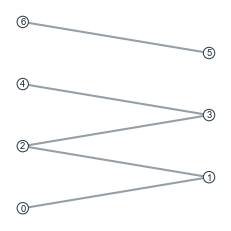

In [119]:
import matplotlib.pyplot as plt

from netgraph import Graph

edges = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (5, 6)
]

Graph(edges, node_layout='bipartite', node_layout_kwargs=dict(subsets=[(0, 2, 4, 6), (1, 3, 5)]), node_labels=True)

plt.show()

In [120]:

import re

strings = [
    'maier_2018_applying_lda_topic_modeling_in_communication_research_toward_a_valid_and_reliable_methodology', 
    'karami_2018_characterizing_diabetes_diet_exercise_and_obesity_comments_on_twitter', 
    'alokaili_2020_automatic_generation_of_topic_labels', 
    'sakshi_2023_recent_trends_in_mathematical_expressions_recognition_an_lda_based_analysis'
]

# Extract year from each string using regular expression
pattern = re.compile(r'\d{4}')
years = [int(pattern.search(s).group()) for s in strings]

# Create a dictionary where the keys are the years and the values are lists of strings
groups = {}
for s, y in zip(strings, years):
    if y in groups:
        groups[y].append(s)
    else:
        groups[y] = [s]

# Convert the dictionary into a list of lists
result = [v for k, v in sorted(groups.items())]

print(result)  # [['maier_2018_applying_lda_topic_modeling_in_communication_research_toward_a_valid_and_reliable_methodology', 'karami_2018_characterizing_diabetes_diet_exercise_and_obesity_comments_on_twitter'], ['alokaili_2020_automatic_generation_of_topic_labels'], ['sakshi_2023_recent_trends_in_mathematical_expressions_recognition_an_lda_based_analysis']]

[['maier_2018_applying_lda_topic_modeling_in_communication_research_toward_a_valid_and_reliable_methodology', 'karami_2018_characterizing_diabetes_diet_exercise_and_obesity_comments_on_twitter'], ['alokaili_2020_automatic_generation_of_topic_labels'], ['sakshi_2023_recent_trends_in_mathematical_expressions_recognition_an_lda_based_analysis']]
